In [1]:
#default_exp
%load_ext autoreload
%autoreload 2

from torch_snippets import *
if P().stem != 'one_shot_omr_optum_intern_repo':
    %cd ..

from lib.generate import *

/Users/yreddy31/Documents/github/one_shot_omr_optum_intern_repo


2021-08-09 17:26:52.186 | INFO     | __main__:<module>:3 - loaded 21 lines


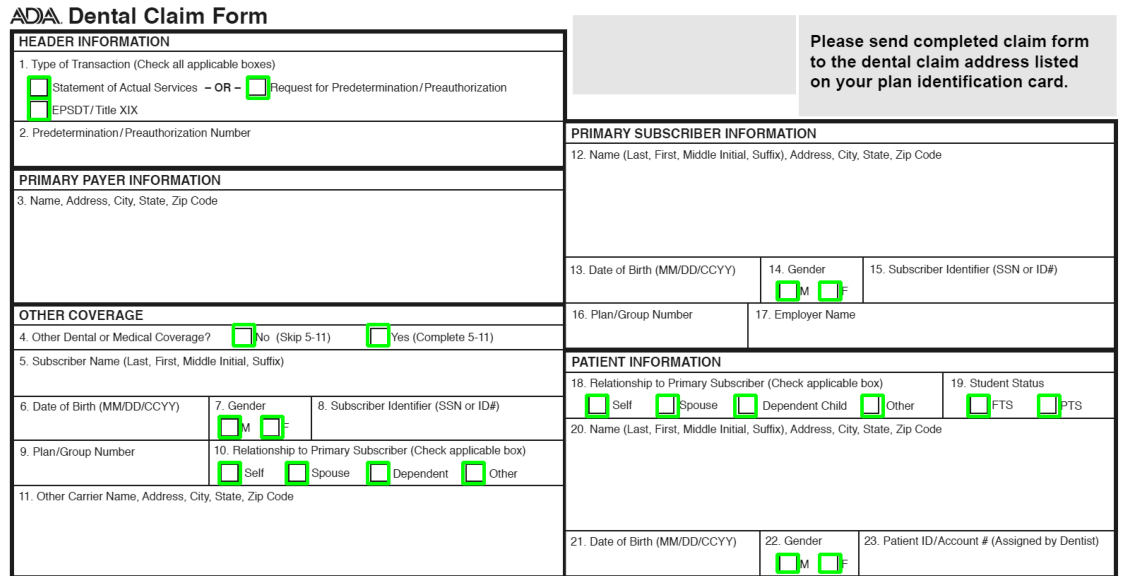

In [2]:
project = P('projects/dental')

lines = readlines(project/'annotations.txt')
lines = [l.split() for l in lines]
CLSS = [int(l) for l,*_ in lines]
BBS = [[int(pt) for pt in pts] for _,*pts in lines]

TEMPLATE = read(project/'template.png')

show(TEMPLATE, bbs=BBS)

In [26]:
records = generate_data(
    TEMPLATE, BBS, CLSS, 5, 
    checkbox_folder='/Users/yreddy31/Documents/data/ocr-data/check_boxes'
)

In [26]:
from lib.connectors.pascal import generate_pascal_datum, generate_pascal_data
generate_pascal_data(
    TEMPLATE, BBS, CLSS, 5, 
    checkbox_folder='/Users/yreddy31/Documents/data/ocr-data/check_boxes',
    output_folder='/tmp/pascal'
)

2021-08-09 18:26:11.652 | INFO     | lib.connectors.yolo:inspect_yolo_data:60 - loaded 42 lines
2021-08-09 18:26:11.654 | INFO     | torch_snippets.paths:inner:24 - 10 files found at /tmp/yolo_test/data


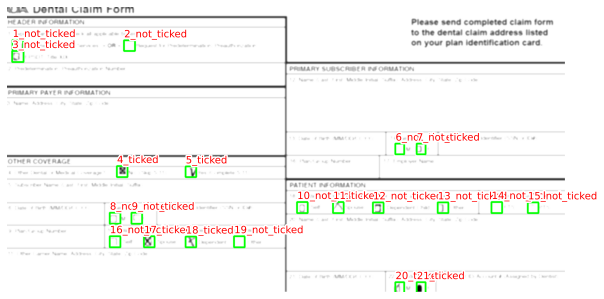

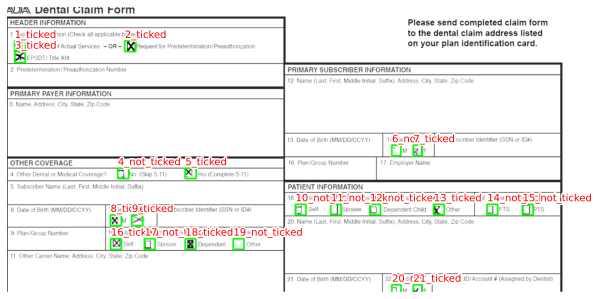

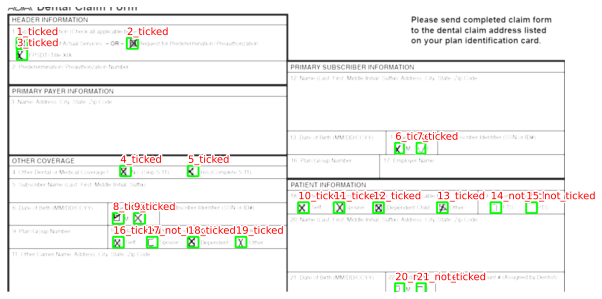

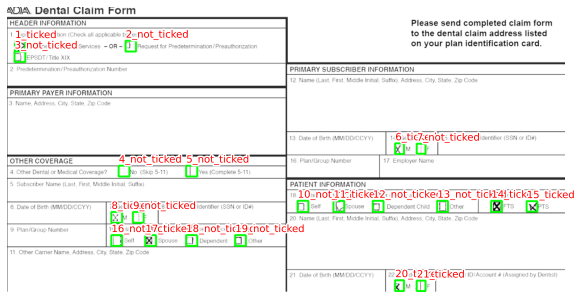

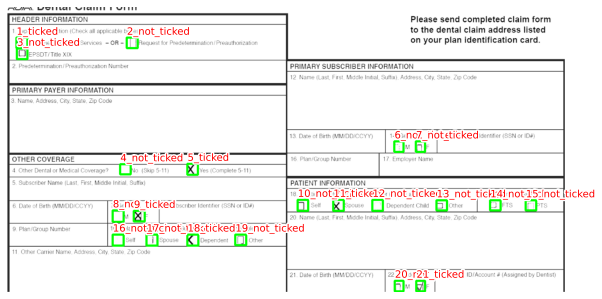

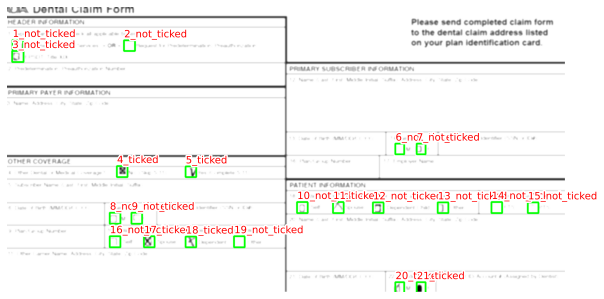

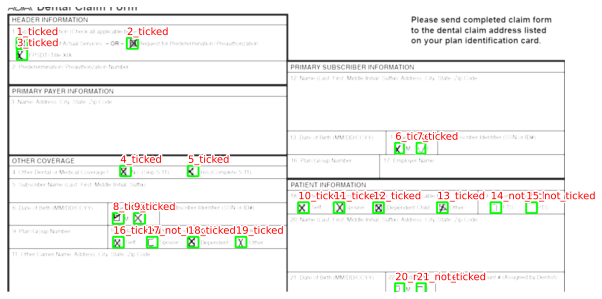

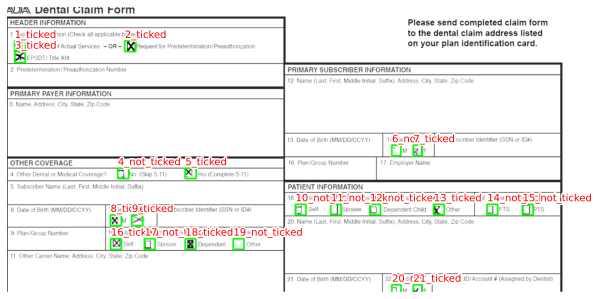

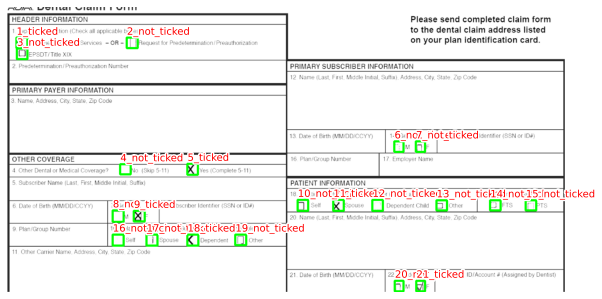

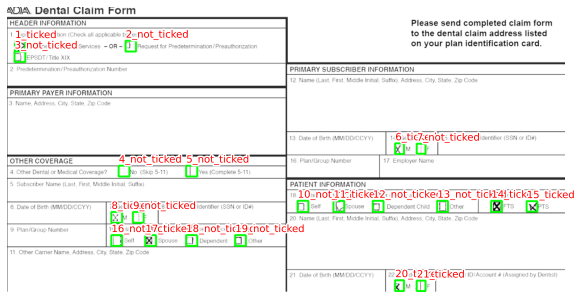

In [27]:
from lib.connectors.pascal import generate_datum

generate_images_in_yolo_format(
    TEMPLATE, BBS, CLSS, 5, 
    checkbox_folder='/Users/yreddy31/Documents/data/ocr-data/check_boxes',
    output_folder='/tmp/yolo_test/'
)

inspect_yolo_data('/tmp/yolo_test/')